Slope: 0.01208715577882871
Intercept: -268.2639050678011


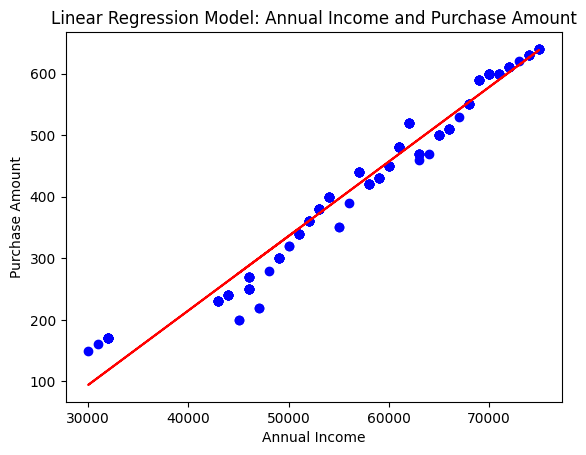

Coefficient: [-1.49338903e-04  2.23104516e+00  3.30180114e+01  1.28171316e+01]
Intercept: -130.17143689848848
Simple Model For R-Squared: 0.9686662678992661
Multivariate Model For R-Squared: 0.9949212030852689


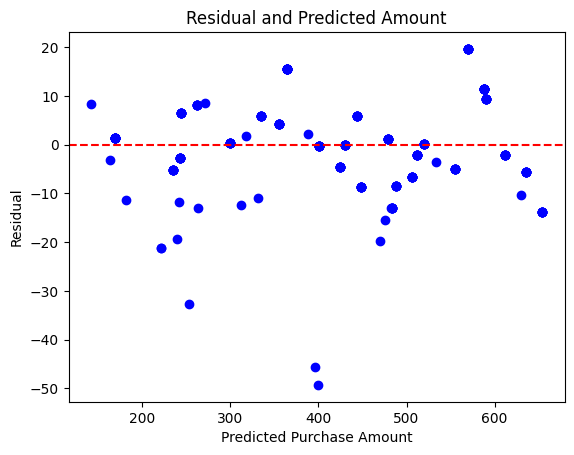

RSS (Simple Model): 145659.72488071377
RSE (Simple Model): 24.843554980534105
RSS (Multivariate Model): 23609.577018992397
RSE (Multivariate Model): 10.06621362449024
MSE (Simple Model): 612.0156507593016
Loss Function (Simple Model): 612.0156507593016
MSE (Multivariate Model): 99.19990344114453
Loss Function (Multivariate Model): 99.19990344114453
Intercept: -130.17143689859572
Coefficients: [-1.49338903e-04  2.23104516e+00  3.30180114e+01  1.28171316e+01]
RSE For Normal Equation: 10.066213624490214
RSS For Normal Equation: 23609.57701899227


In [5]:
Title:  'Homework 3: Linear Regression Project'
Subtitle: 'ISTA 421 -- Fall 2024'
Author: "Celso Haros | College of Information"

#1. Demonstration of Dataset
import pandas as pd
df = pd.read_csv("C:/Users/haros/Downloads/Customer Purchasing Behaviors.csv")
df.head()

#2. Description of Dataset

#The dataset I chose pertaining to customer purchasing behaviors, as defined by its information. 
#It's sourced by a general make-shift retail example, as it proceeds to track both behavioral and demographic factors which substantiate customer spending patterns for businesses and tech firms alike. 
#It contains 7 columns and 238 rows.

#Variable Types:
#1. user_id (integer).
#2. age (integer).
#3. annual_income (integer).
#4. purchase_amount (integer).
#5. loyalty_score (float).
#6. region (categorical).
#7. purchase_frequency (integer).
#I care about this dataset as it provides inherently crucial information that influences a customer's purchase behavior. 
#I personally work at Sherwin Williams, and I've always suggested systems as such to better automating customer behavior and shifting intent and demeanor towards selling what is likely to be sold most, when, and upon which sales pitch. 

#3. 


#4. Applied Programming

#Libraries 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

#Dataset
df = pd.read_csv(r"C:\Users\haros\Downloads\Customer Purchasing Behaviors.csv")

#Feature and target 
X_simple = df[['annual_income']]
y_simple = df['purchase_amount']

model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

#Predictor
y_pred_simple = model_simple.predict(X_simple)

#Slope/Intercept
slope = model_simple.coef_[0]
intercept = model_simple.intercept_

#Slope/Intercept Print
print("Slope:", slope)
print("Intercept:", intercept)

#Plot 
plt.scatter(df['annual_income'], df['purchase_amount'], color='blue')
plt.plot(df['annual_income'], y_pred_simple, color='red')
plt.xlabel('Annual Income')
plt.ylabel('Purchase Amount')
plt.title('Linear Regression Model: Annual Income and Purchase Amount')
plt.show()

#Multivariate linear regression
X_multi = df[['annual_income', 'age', 'loyalty_score', 'purchase_frequency']]
y_multi = df['purchase_amount']
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

#Predictor
y_pred_multi = model_multi.predict(X_multi)

#Coefficients/Intercept
coefficients = model_multi.coef_
intercept = model_multi.intercept_

#Print Coefficients/Intercept
print("Coefficient:", coefficients)
print("Intercept:", intercept)

#R-squared for models
r_squared_simple = model_simple.score(X_simple, y_simple)
r_squared_multi = model_multi.score(X_multi, y_multi)

#Print R-squared values
print("Simple Model For R-Squared:", r_squared_simple)
print("Multivariate Model For R-Squared:", r_squared_multi)

#Residuals
residuals = y_multi - y_pred_multi

#Plot Residual
plt.scatter(y_pred_multi, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Purchase Amount')
plt.ylabel('Residual')
plt.title('Residual and Predicted Amount')
plt.show()

#5. Conceptual Questions

#5. 1.) Compare and Contrast RSS and RSE.
#Library Import
import numpy as np

rss_simple = np.sum((y_simple - y_pred_simple) ** 2)
n_simple = len(y_simple)
p_simple = 1  # Only 1 predictor (annual_income)
rse_simple = np.sqrt(rss_simple / (n_simple - p_simple - 1))

#Print
print("RSS (Simple Model):", rss_simple)
print("RSE (Simple Model):", rse_simple)

#Multivariate linear regression model
rss_multi = np.sum((y_multi - y_pred_multi) ** 2)
n_multi = len(y_multi)
p_multi = X_multi.shape[1]  # Number of predictors
rse_multi = np.sqrt(rss_multi / (n_multi - p_multi - 1))

#Print
print("RSS (Multivariate Model):", rss_multi)
print("RSE (Multivariate Model):", rse_multi)

#In a simple model, the RSS's score indicates higher a higher error margin between predictors than purchase amounts. This is found to be the contrary when it comes to the smaller RSS in the multivariate model which captures more variance than the former.
#The lower RSE in the multivariate model has fewer residual errors than the simple model, accounting for a better ability to normalize error leading to errors and creating a much more interpretable metric. 
#Ergo, the multivariate model outdoes the simple model as seen in both RSE and RSS scores thanks to its ability to better generalize and accounting for its smaller margin of error. 

#5. 2.) Compare and Contrast MSE and Loss Function.

import numpy as np
#MSE
mse_simple = np.mean((y_simple - y_pred_simple) ** 2)

#Loss Function
loss_simple = mse_simple  # MSE is commonly used as the loss function in linear regression

#Multivariate Linear Regression
mse_multi = np.mean((y_multi - y_pred_multi) ** 2)
loss_multi = mse_multi  # Using MSE as the loss function

#Print
print("MSE (Simple Model):", mse_simple)
print("Loss Function (Simple Model):", loss_simple)
print("MSE (Multivariate Model):", mse_multi)
print("Loss Function (Multivariate Model):", loss_multi)

#A smaller MSE indicates the predictions are close to actual values, as the MSE for the simple model is 612.02 and for the lower multivariate model it's 99.20 (which also indicates a much better fit here). 
#The loss function refers to varying error functions (such as those pertaining to absolute error and/or hinge loss) whereas the MSE, though it is used at times as a loss function, fits within that umbrella term, 
#but ultimately shifts into a different direction specific to regression models to best quantify a model's performance and ability to reduce error as much as possible. 

#5. 3.)

#Linear regression may seem like a simple concept at first but in actuality requires a multitude of complex tasks that give it a more challenging completion and refinement process than many other statistical endeavors.
#Linearity, independence of errors, and constant variance of residuals are axioms presupposed in its logic and mode of actuality, more specifically, in the multivariate line of linear regression, the ever-prevalent issue of multicollinearity occurs when an independent variable is highly correlated which makes it difficult to determine the true impact of a predictor. 
#The bias-variance tradeoff becomes critical in underfitting or overfitting the model as linear regression once more has extensions, like the unexplored polynomial regression. It really requires a deeper and more nuanced than most understanding of what's in front of you and the tools at hand. 

#5. 4.) 

#Given my aforementioned values, the multivariate model is the better fit due to how one would interpret four values in specific: the r-squared, the RSS, the RSE, and the MSE. The r-squared has a variance of 99.49% (which is higher than the previous r-squared of the simple model being 96.87%), and a significantly lower RSS value than the one in the simple model (23,609.58 to 145,659.72, for reference). 
#The RSE error rate is 10.07 to the simple model's 24.84, and the MSE is also much lower (99.20 to the simple model's 612.02). The multivariate model simply offers less error and more accurate predictions overall. 

#EXTRA CREDIT: Derive the Normal Equations for Multi-linear Regression

import numpy as np
import pandas as pd

df = pd.read_csv(r"C:/Users/haros/Downloads/Customer Purchasing Behaviors.csv")

#Input features and target variables
X = df[['annual_income', 'age', 'loyalty_score', 'purchase_frequency']].values  # Convert DataFrame to numpy array
y = df['purchase_amount'].values  # Target variable (purchase amount)

#Intercept column of ones (bias of linear regression model)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

#Normal Equation
# Beta = (X.T * X)^-1 * X.T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

#Coefficient/Intercept
intercept = theta_best[0]
coefficients = theta_best[1:]
# Print
print("Intercept:", intercept)
print("Coefficients:", coefficients)

#Predictor 
y_pred = X_b.dot(theta_best)

#Calculate RSS
rss = np.sum((y - y_pred) ** 2)

#Calculate RSE 
n = len(y)
p = X.shape[1]
rse = np.sqrt(rss / (n - p - 1))

#Print for RSE and RSS
print("RSE For Normal Equation:", rse)
print("RSS For Normal Equation:", rss)